# PyTorch tensors
        A tensor is a multi-dimensional matrix similar to NumPy's ndarrays

* A scalar can be represented as a zero-dimensional tensor.
* A vector can be represented as a one-dimensional tensor.
* A two-dimensional matrix can be represented as a two-dimensional tensor.
* A multi-dimensional matrix can be represented as a multi-dimensional tensor.

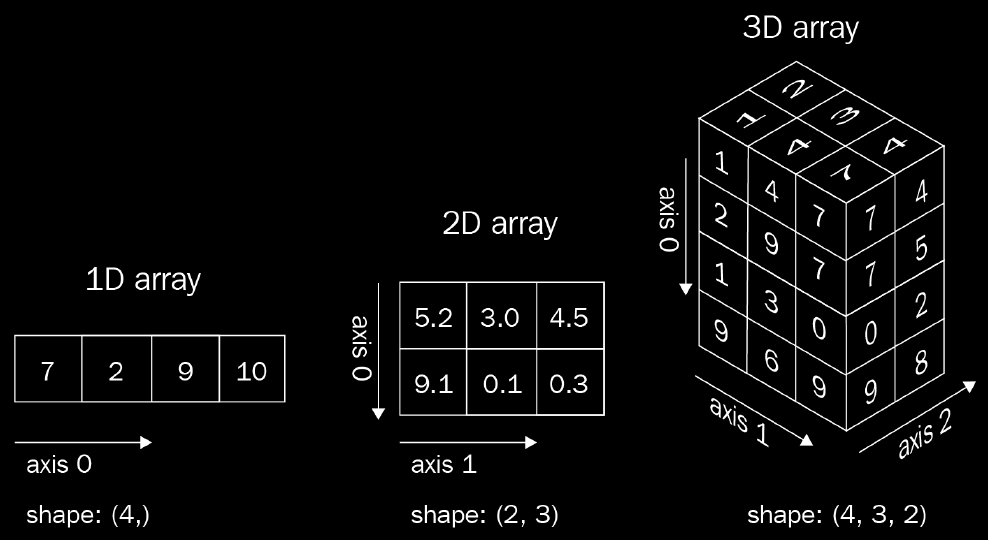

# Initializing a tensor

* Tensors have various applications, including serving as fundamental data structures for images.
* Tensors also commonly used to initialize the weights that connect different layers in a neural network.

In [1]:
# 1. Import PyTorch and initialize a tensor
import torch

x = torch.tensor([1,2])       # one entity of two items
y = torch.tensor([[1],
                  [2]])     # two entities of one item each

# 2. access the tensor object's shape and data type
print(f'Tensor X shape = {x.shape}')
print(f'Tensor Y shape = {y.shape}')
print(f'Tensor data type = {x.dtype}')

Tensor X shape = torch.Size([2])
Tensor Y shape = torch.Size([2, 1])
Tensor data type = torch.int64


     All elements must have the same data type.
     so if it contains different data types, the tensor is converted to the most general data type

In [2]:
x = torch.tensor([False, 1, 2.0])
print(f'Tensor X = {x}')
print(f'Tensor X Dtype = {x.dtype}')

Tensor X = tensor([0., 1., 2.])
Tensor X Dtype = torch.float32


    Tensor objects can be initialized using built-in functions, similar to NumPy.
    This initialization is aim to setting up the initial weights of a neural network.

In [3]:
# 3.Generate a tensor object that has three rows and four columns filled with zeros
zeros_tensor = torch.zeros((3,4))
print(f'Zeros Tensor =  \n{zeros_tensor}')

Zeros Tensor =  
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [4]:
# 4.Generate a tensor object that has three rows and four columns filled with ones
ones_tensor = torch.ones((3,4))
print(f'Ones Tensor = \n {ones_tensor}')

Ones Tensor = 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [5]:
# 5. Generate three rows and four columns of values between 0 and 10
# ==> (including the low value but not including the high value)
random_int_tensor = torch.randint(low=0 , high=10 , size=(3,4))
print(f'Random INT Tensor = \n {random_int_tensor}')

Random INT Tensor = 
 tensor([[4, 1, 7, 5],
        [3, 8, 6, 2],
        [7, 5, 0, 3]])


In [6]:
# 6. Generate random numbers between 0 and 1 with three rows and four columns
random_tensor = torch.rand(3,4)
print(f'Random Tensor = \n {random_tensor}')

Random Tensor = 
 tensor([[0.2893, 0.8990, 0.5431, 0.1062],
        [0.1448, 0.6078, 0.5865, 0.1029],
        [0.1958, 0.3252, 0.8232, 0.3098]])


In [7]:
# 7.Generate numbers that follow a normal distribution with three rows and four columns
normal_distribution_tensor = torch.randn(3,4)
print(f'Normal Distribution Tensor = \n {normal_distribution_tensor}') # output tensor (mean 0 and standard deviation 1 )

Normal Distribution Tensor = 
 tensor([[-0.5660, -1.0141,  1.1876,  0.8100],
        [-0.3603, -0.8123,  0.5049,  0.5894],
        [-1.0226, -1.6370, -1.4003,  0.2170]])


In [8]:
# 8. convert a NumPy array into a Torch tensor and revers
import numpy as np
x = np.array([[10,20,30],[2,3,4]])
y = torch.tensor(x)
z = y.numpy()
print(type(x), type(y), type(z))

<class 'numpy.ndarray'> <class 'torch.Tensor'> <class 'numpy.ndarray'>


# Operations on tensors

    Tensor objects allow you to perform basic operations akin to NumPy, including matrix multiplication, bias addition, and reshaping, especially relevant in neural network operations.

In [9]:
# 1. Multiplication of all the elements present in x by 10
x = torch.tensor([[1,2,3,4],
                  [5,6,7,8]])
print(f'Tensor Scalar Multiplication = \n {x*10}')

# 2. Adding 10 to the elements in x
print(f'Tensor Scalar Addition = \n {x+10}')

Tensor Scalar Multiplication = 
 tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])
Tensor Scalar Addition = 
 tensor([[11, 12, 13, 14],
        [15, 16, 17, 18]])


In [10]:
# 3. Reshaping a tensor
x = torch.tensor([2, 3, 1, 0])
print(f'Tensor Shape = \n {x.shape}')

x = x.view(2,2)
print(f'Tensor reshaping Shape = \n {x.shape}')

Tensor Shape = 
 torch.Size([4])
Tensor reshaping Shape = 
 torch.Size([2, 2])


In [11]:
# 4. reshape a tensor using the "squeeze" method by specifying the axis index to remove
# but it only works if the targeted axis has a single item in that dimension.
x = torch.randn(10,1,10)
z1 = torch.squeeze(x,1)

# The same operation can be directly performed on
# x by calling squeeze and the dimension to squeeze out
z2 = x.squeeze(1)

# all the elements in both tensors are equal
assert torch.all(z1 == z2)

print(f'orignal shape = \n{x.shape} \n Squeezed shape = \n {z1.shape}')

orignal shape = 
torch.Size([10, 1, 10]) 
 Squeezed shape = 
 torch.Size([10, 10])


In [12]:
# 5. The opposite of squeeze is unsqueeze, which means we add a dimension to the matrix
x = torch.randn(10,10)
z1 = x.unsqueeze(0)

print(f'orignal shape = \n{x.shape} \n UNSqueezed shape = \n {z1.shape}')

orignal shape = 
torch.Size([10, 10]) 
 UNSqueezed shape = 
 torch.Size([1, 10, 10])


In [13]:
# The same can be achieved using [None] indexing
# Adding None will auto create a fake dim at the specified axis
x = torch.randn(10,10)
z2 = x[None,: ,:]
z3 = x[:,None,:]
z4 = x[:,:,None]
print(z2.shape,'\n', z3.shape,'\n', z4.shape)

torch.Size([1, 10, 10]) 
 torch.Size([10, 1, 10]) 
 torch.Size([10, 10, 1])


In [14]:
# 6. Matrix multiplication of two different tensors
y = torch.tensor([2, 3, 1, 0])
y = y.view(4,1)
x = torch.tensor([[1,2,3,4],
                   [5,6,7,8]])
print(f'Matrix multiplication X * y = \n {torch.matmul(x, y)}')

Matrix multiplication X * y = 
 tensor([[11],
        [35]])


In [15]:
# Alternatively, matrix multiplication can also be performed by using the @ operator
print(f'Matrix multiplication X * y = \n {x@y}')

Matrix multiplication X * y = 
 tensor([[11],
        [35]])


In [16]:
# 7. Similar to concatenate in NumPy, we can perform concatenation of tensors using the cat method
x = torch.randn(3,3,3)
z = torch.cat([x,x], axis=0) # np.concatenate()
z1 = torch.cat([x,x], axis=1)
print(f'Shape Before concatenate =\n {x.shape}\nShape After concatenate on X axis = \n{z.shape}\nShape After concatenate on Y axis = \n{z1.shape}')

Shape Before concatenate =
 torch.Size([3, 3, 3])
Shape After concatenate on X axis = 
torch.Size([6, 3, 3])
Shape After concatenate on Y axis = 
torch.Size([3, 6, 3])


In [17]:
# 8. Extraction of the maximum value in a tensor
x = torch.arange(18).reshape(3,6)
print(f"Max Value in Tensor X = {x.max()}")

Max Value in Tensor X = 17


    max return 2 output (values,indices)

In [18]:
x.max(dim=1)  # columns

torch.return_types.max(
values=tensor([ 5, 11, 17]),
indices=tensor([5, 5, 5]))

In [19]:
x.max(dim=0)  # rows

torch.return_types.max(
values=tensor([12, 13, 14, 15, 16, 17]),
indices=tensor([2, 2, 2, 2, 2, 2]))

In [20]:
## NOTE
values , indices = x.max(dim=0)
assert torch.all(indices == x.argmax(dim=0))

    9. The min operation is exactly the same as max but returns the minimum and arg-minimum where applicable.

In [21]:
# 10. Permute the dimensions of a tensor object
x = torch.randn(10,20,30)
z = x.permute(2,0,1) # np.permute()
print(f'Before Permute = {x.shape}\n After Permute = {z.shape}')

Before Permute = torch.Size([10, 20, 30])
 After Permute = torch.Size([30, 10, 20])


        * Never use `tensor.view` to reshape a tensor for swapping dimensions; instead, always use permute to avoid unexpected results during training.

You can perform most NumPy operations in PyTorch with a similar syntax, making it essential to understand that a wide range of mathematical operations can be applied directly to PyTorch tensors, and you can easily find method documentation using `dir(torch.Tensor)` and `help(torch.Tensor.<method>)`.

In [22]:
dir(torch.Tensor)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__cuda_array_interface__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__'

In [23]:
help(torch.Tensor.view)

Help on method_descriptor:

view(...)
    view(*shape) -> Tensor
    
    Returns a new tensor with the same data as the :attr:`self` tensor but of a
    different :attr:`shape`.
    
    The returned tensor shares the same data and must have the same number
    of elements, but may have a different size. For a tensor to be viewed, the new
    view size must be compatible with its original size and stride, i.e., each new
    view dimension must either be a subspace of an original dimension, or only span
    across original dimensions :math:`d, d+1, \dots, d+k` that satisfy the following
    contiguity-like condition that :math:`\forall i = d, \dots, d+k-1`,
    
    .. math::
    
      \text{stride}[i] = \text{stride}[i+1] \times \text{size}[i+1]
    
    Otherwise, it will not be possible to view :attr:`self` tensor as :attr:`shape`
    without copying it (e.g., via :meth:`contiguous`). When it is unclear whether a
    :meth:`view` can be performed, it is advisable to use :meth:`resh

# Auto gradients of tensor objects

* Tensor objects have built-in functionality for calculating gradients, which is crucial for updating neural network weights.

In [24]:
# 1.Define a tensor object and also specify that it requires a gradient to be calculated
x = torch.tensor([[2.0, -1.0],
                  [1.0, 1.0]], requires_grad=True)
# requires_grad parameter specifies that the gradient is to be calculated for the tensor object

x

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)

In [25]:
# 2. define the way to calculate the output, which is the sum of the squares of all inputs
out = x.pow(2).sum() # gradient of function is 2*x

# 3. The gradient of a value can be calculated by calling the backward() method
out.backward()

# 4. the gradient of out with respect to x
print(f'Gradient of x.pow(2) = \n{x.grad}')

Gradient of x.pow(2) = 
tensor([[ 4., -2.],
        [ 2.,  2.]])


# Advantages of PyTorch's tensors over NumPy's ndarrays

* When optimizing weight values, small weight variations are used to minimize the loss, and this process can be enhanced by updating weights in parallel using a GPU's multiple cores.

* Torch tensor objects are more optimized for GPU usage compared to NumPy.

In [26]:
##Perform a matrix multiplication experiment using NumPy arrays and tensor objects to compare the time taken for the operation

# 1.  Generate two different torch objects
x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)

# 2. Define the device to which we will store the tensor objects we created in
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 3. Register tensor objects with the device
x, y = x.to(device) , y.to(device)

# 4. Perform matrix multiplication using Torch objects and time it for speed comparison with NumPy arrays
print("Torch tensor multiplication on GPU Time =")
%timeit z=(x@y)

# 5. Perform matrix multiplication of the same tensors on cpu
print("Torch tensor multiplication on CPU Time =")
x, y = x.cpu(), y.cpu()
%timeit z=(x@y)

# 6. Perform the same matrix multiplication, this time on NumPy arrays
print("Numpy array multiplication Time =")
x = np.random.random((1, 6400))
y = np.random.random((6400, 5000))
%timeit z = np.matmul(x,y)

Torch tensor multiplication on GPU Time =
3.64 ms ± 259 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Torch tensor multiplication on CPU Time =
4.71 ms ± 43.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Numpy array multiplication Time =
10.7 ms ± 215 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Building a neural network using PyTorch

In [27]:
# 1. Define the input (x) and output (y) values
x = [[1, 2],
     [3, 4],
     [5, 6],
     [7, 8]]
y = [[3],[7],[11],[15]]

# 2. Convert the input lists into tensor objects and register it to device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X = torch.tensor(x).float().to(device)
Y = torch.tensor(y).float().to(device)

In [28]:
x = [[1, 2],
     [3, 4],
     [5, 6],
     [7, 8]]
print(len(x))

4


In [29]:
# 3. Define the neural network architecture
import torch.nn as nn

##  inherit from nn.Module as it is the base class for all neural network modules
class MyNeuralNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        # Define the layers in the neural network
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_output_layer = nn.Linear(8, 1)
    # connect the components together
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_output_layer(x)
        return x

In [30]:
# understand what the linear functions do 
print(nn.Linear(2, 7))

Linear(in_features=2, out_features=7, bias=True)


In [31]:
# 4. You can access the initial weights of each of the components
##  Create an instance of the MyNeuralNet class objec
mynet = MyNeuralNet().to(device)

##  The weights and bias of each layer can be accessed
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[ 0.0089, -0.6138],
        [ 0.5320,  0.0565],
        [-0.5331, -0.0576],
        [ 0.0529,  0.4994],
        [-0.1563, -0.5204],
        [-0.3870,  0.3322],
        [ 0.6956,  0.1482],
        [-0.2740, -0.2876]], device='cuda:0', requires_grad=True)

In [32]:
mynet.hidden_output_layer.weight

Parameter containing:
tensor([[-0.3124, -0.2099, -0.3136, -0.3209, -0.0389,  0.0800, -0.0540, -0.0586]],
       device='cuda:0', requires_grad=True)

* The values in your output change with each run because the neural network is initialized with random values every time.

* To ensure consistent output in multiple iterations, specify a seed with torch.manual_seed before initializing the neural network.


In [33]:
# how to obtain parameters of all layers in a model
mynet.parameters()  ## The preceding code returns a generator object

for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[ 0.0089, -0.6138],
        [ 0.5320,  0.0565],
        [-0.5331, -0.0576],
        [ 0.0529,  0.4994],
        [-0.1563, -0.5204],
        [-0.3870,  0.3322],
        [ 0.6956,  0.1482],
        [-0.2740, -0.2876]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.0377, -0.0542, -0.4084,  0.3658,  0.4456, -0.6720,  0.0466,  0.0439],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.3124, -0.2099, -0.3136, -0.3209, -0.0389,  0.0800, -0.0540, -0.0586]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.3465], device='cuda:0', requires_grad=True)


    In the model, tensors are automatically created and registered for forward and backward propagation when defining neural network layers in the `__init__` method.

    You can also manually register these parameters using the `nn.Parameter(<tensor>)` function.

In [34]:
# class MyNeuralNet(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.input_to_hidden_layer = nn.Parameter(torch.rand(2,8))
#         self.hidden_layer_activation = nn.ReLU()
#         self.hidden_to_output_layer = nn.Parameter(torch.rand(8,1))
#     def forward(self, x):
#         x = x @ self.input_to_hidden_layer
#         x = self.hidden_layer_activation(x)
#         x = x @ self.hidden_to_output_layer
#         return x

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Mutli-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) | 
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) | 

In [35]:
# 5. Define the loss function that we optimize for.
loss_func = nn.MSELoss()
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

# Note that loss value can differ in your instance
# due to a different random weight initialization

tensor(148.9666, device='cuda:0', grad_fn=<MseLossBackward0>)


In [36]:
# 6. Import the SGD method from the torch.optim module 
from torch.optim import SGD
opt = SGD(mynet.parameters() , lr = 0.001)

### Perform all the steps to be done in an epoch together
1. Calculate the loss for the input and output.
2. Compute the gradients for each parameter.
3. Update the weights using the gradients and a learning rate.
4. Ensure that gradients are reset after each weight update to avoid interference in the next epoch.

In [37]:
# 7. Perform all the steps to be done in an epoch together
loss_history = []
for _ in range(50):                    # Times of performing all steps together
    opt.zero_grad()                    # flush the previous epoch's gradients
    loss_value = loss_func(mynet(X),Y) # compute loss
    loss_value.backward()              # perform back-propagation
    opt.step()                         #  update the weights according to the gradients computed
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

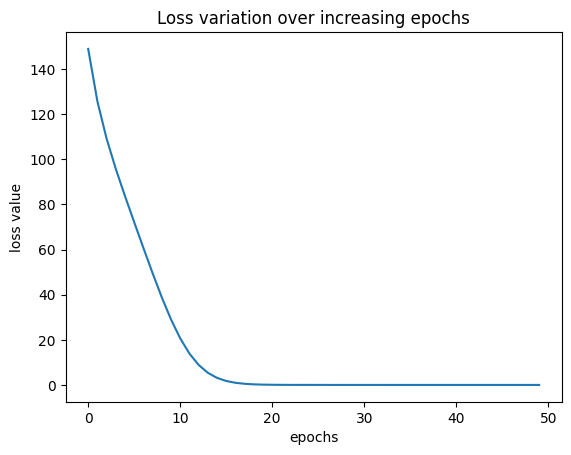

In [38]:
# plot the variation in loss over increasing epochs
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In this section, weights of a neural network have been updated based on the entire input dataset, but the next section will explore the benefits of using a sample of input data points for weight updates.

# Dataset, DataLoader, and batch size

* **Batch size** : refers to the number of data points considered to calculate the loss value or update weights.

* It is particularly useful in scenarios with a large amount of data when using all data for one weight update is impractical due to memory constraints, and a representative sample can be used instead.

* Batch size allows fetching multiple samples of data that are representative but not necessarily 100% reflective of the entire dataset, making training more efficient.

In [39]:
# 1. Import the methods that help in loading data and dealing with datasets
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

# 2. Import the data, convert the data into floating-point numbers, and register them to a device
x = [[1, 2],[3, 4],[5, 6],[7, 8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x, dtype=torch.float32).to(device)
Y = torch.tensor(y, dtype=torch.float32).to(device)

# 3. Instantiate a class of the dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x.clone().detach().requires_grad_(True)
        self.y = y.clone().detach().requires_grad_(True)
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

# 4. Create an instance of the defined class
ds = MyDataset(X, Y)

# 5. Pass the dataset instance defined previously through DataLoader to fetch batch_size
dl = DataLoader(ds, batch_size=2, shuffle=True)

The main aim of creating MyDataset class is to encapsulate a dataset in a format that is compatible with PyTorch's data loading utilities, such as `DataLoader`.

By following the conventions set by the PyTorch `Dataset` class, you can easily integrate your custom dataset into PyTorch's training pipeline, allowing you to load and preprocess data efficiently, create data batches, and iterate through the dataset during training of neural networks.

In [40]:
# to print the input and output batches of data
for x,y in dl:
    print(f"X Batch = {x}\nY Batch = {y}")

X Batch = tensor([[7., 8.],
        [1., 2.]], device='cuda:0', grad_fn=<StackBackward0>)
Y Batch = tensor([[15.],
        [ 3.]], device='cuda:0', grad_fn=<StackBackward0>)
X Batch = tensor([[5., 6.],
        [3., 4.]], device='cuda:0', grad_fn=<StackBackward0>)
Y Batch = tensor([[11.],
        [ 7.]], device='cuda:0', grad_fn=<StackBackward0>)


In [41]:
# 6. Next, we define the model object (mynet), loss function (loss_func), and optimizer (opt)
mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
opt = SGD(mynet.parameters(), lr = 0.001)

# 8. Finally, loop through the batches of data points to minimize the loss value
import time

loss_history = []
start = time.time()
for _ in range(50):
    for x,y in dl :
        opt.zero_grad()
        loss_value = loss_func(mynet(x),y)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)      

0.1328907012939453


Text(0, 0.5, 'loss value')

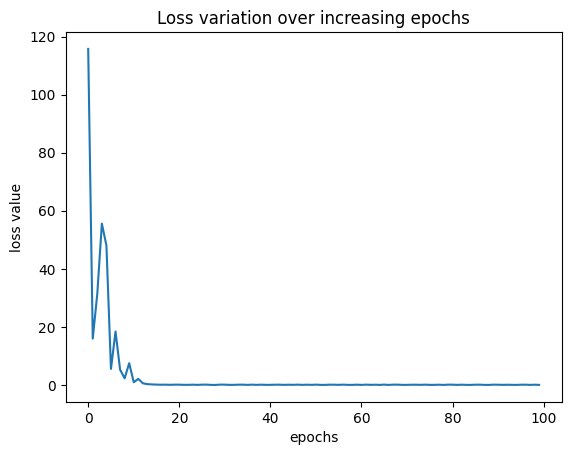

In [42]:
# plot the variation in loss over increasing epochs When use batch=2
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

# Predicting on new data points

In [49]:
# 1. Create the data points that we want to test our model on
val_x = [[10, 11]]

# 2. Convert the new data points into a tensor float object and register to the device
val_x = torch.tensor(val_x , dtype=torch.float).to(device)

# 3. Pass the tensor object through the trained neural network – mynet – as if it were a Python function
predict_value = mynet(val_x)
print(f'predicted output values associated with the input data points = {predict_value.item():0.2f}')

predicted output values associated with the input data points = 21.43


# Implementing a custom loss function

In certain cases, we might have to implement a loss function that is customized to the problem we are solving – especially in complex use cases involving object detection/generative adversial networks (GANs).

In [53]:
# Define the custom loss function by taking two tensor objects as input
def Custom_MSELoss(_y,y):
    loss = (_y-y)**2
    loss = loss.mean()
    return loss

In [60]:
# comparing the value in build in loss func and custom loss func
loss_func = nn.MSELoss()
loss_value_buildin_loss = loss_func(mynet(X),Y)

loss_value_custom_loss = Custom_MSELoss(mynet(X),Y)

print(f'Loss value with `MSELoss` = {loss_value_buildin_loss:0.4f} \
       \nLoss value with `Custom_MSELoss` = {loss_value_custom_loss:0.4f}')


Loss value with `MSELoss` = 0.0519        
Loss value with `Custom_MSELoss` = 0.0519


# Fetching the values of intermediate layers